# Load in csv file with compounds and their predicted StarDrop properties

Stardrop properties include:


*   logS
*   logD
*   logP
*   Molecular weight
*   TPSA
*   HBD
*   HBA
*   Flexibility
*   Rotatable bonds

The class column contains info on whether the specified compound showed activity towards specific parasite stages. Activity towards a specific parasite stage was determined based on fold change values between asexuals and gametocytes IC50 data.

Class classification:


*   ABS preference was defined as >10-fold change (FC) difference in activity between all gametocyte stages and ABS parasites (Gc IC50/ABS IC50).
*   ABS and iGc preference is defined as <10-FC difference in activity between iGc and ABS parasites (iGc IC50/ABS IC50).
*   ABS, LGc and mGc preference is defined as <10-FC difference in activity between LGc and mGc and ABS parasites (LGc IC50/ABS IC50, mGc IC50/ABS IC50).
*   LGc and mGc preference is defined as <1-FC difference in activity between LGc and mGc and ABS parasites (LGc IC50/ABS IC50, mGc IC50/ABS IC50).


#Load in dataset

In [ ]:
############################################Sexual data
import pandas as pd
sxl= pd.read_csv("/content/StardropDesc.csv")
sxl=sxl.dropna()
sxl

,SMILES,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds,Class
1,Cc1cc(C)c2CN(Cc3ccccc3Cl)COc2c1,1.6220,3.407,4.263,287.8,12.47,0.0,2.00,0.09091,2.0,ABS
3,Nc1ccc(cc1)c2nc3cc(Cc4ccc5[nH]c(nc5c4)c6ccc(N)...,0.4949,3.498,4.065,430.5,109.40,4.0,6.00,0.10530,4.0,ABS
5,FC(F)(F)Oc1cccc(c1)c1nc2c(nccc2[NH]1)N1CCC(N)CC1,2.0610,2.407,2.246,377.4,80.06,2.0,6.00,0.13330,4.0,ABS
7,FC(F)(F)c1ccc(nc1)N1CCN(CC1)S(=O)(=O)NC1OC2OC3...,0.4456,2.992,3.397,576.6,102.50,1.0,10.00,0.11360,5.0,ABS
9,CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C...,2.0630,2.935,2.935,298.4,46.15,0.0,5.00,0.04167,1.0,ABS
...,...,...,...,...,...,...,...,...,...,...,...
2834,CCOC(=O)C1=C(NC(C)=O)SC2=C(O)C(CNC3CCCCC3)=CC=C12,1.3290,1.472,4.176,390.5,3.00,6.0,87.66,0.27590,8.0,ABS_iGc_mGc
2835,C[C@@H](NC[C@@H](O)[C@H](Cc1ccccc1)NC(=O)c2ccc...,2.8060,1.704,2.811,514.7,3.00,7.0,84.91,0.29270,12.0,ABS_iGc_mGc
2836,CCCC[n+]1c2ccccc2sc1C=C3C=Cc4ccccc4N3CC,0.6185,2.662,5.562,361.5,0.00,2.0,7.12,0.17240,5.0,ABS_iGc_mGc
2837,CN1C=C(C(C)=N1)C1=NS(=O)(=O)N(C)C(=C1)C(=O)NC1...,1.6450,1.900,1.900,438.3,1.00,8.0,96.66,0.14290,4.0,ABS_iGc_mGc


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sxl['Target']= le.fit_transform(sxl['Class'])
# Retrieve the mapping
class_mapping = {index: label for index, label in enumerate(le.classes_)}

# Print the mapping
print("Class Mapping: ", class_mapping)
sxl['Target'].unique()

Class Mapping:  {0: 'ABS', 1: 'ABS_IgC', 2: 'ABS_iGc_mGc', 3: 'Late_mGC'}


array([0, 1, 3, 2])

In [ ]:
target= pd.DataFrame()
target["Stage"]=sxl["Target"]
del sxl["Target"]

In [ ]:
del sxl["Class"]

In [ ]:
del sxl["SMILES"]

In [ ]:
sxl

,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds
1,1.6220,3.407,4.263,287.8,12.47,0.0,2.00,0.09091,2.0
3,0.4949,3.498,4.065,430.5,109.40,4.0,6.00,0.10530,4.0
5,2.0610,2.407,2.246,377.4,80.06,2.0,6.00,0.13330,4.0
7,0.4456,2.992,3.397,576.6,102.50,1.0,10.00,0.11360,5.0
9,2.0630,2.935,2.935,298.4,46.15,0.0,5.00,0.04167,1.0
...,...,...,...,...,...,...,...,...,...
2834,1.3290,1.472,4.176,390.5,3.00,6.0,87.66,0.27590,8.0
2835,2.8060,1.704,2.811,514.7,3.00,7.0,84.91,0.29270,12.0
2836,0.6185,2.662,5.562,361.5,0.00,2.0,7.12,0.17240,5.0
2837,1.6450,1.900,1.900,438.3,1.00,8.0,96.66,0.14290,4.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(sxl, target["Stage"],test_size=0.2, random_state=42)

#Chemical space and class distribution of training and testing data

<ipython-input-11-105b4eed7098>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_mapped, palette=palette, order=class_names)
<ipython-input-11-105b4eed7098>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_mapped, palette=palette, order=class_names)


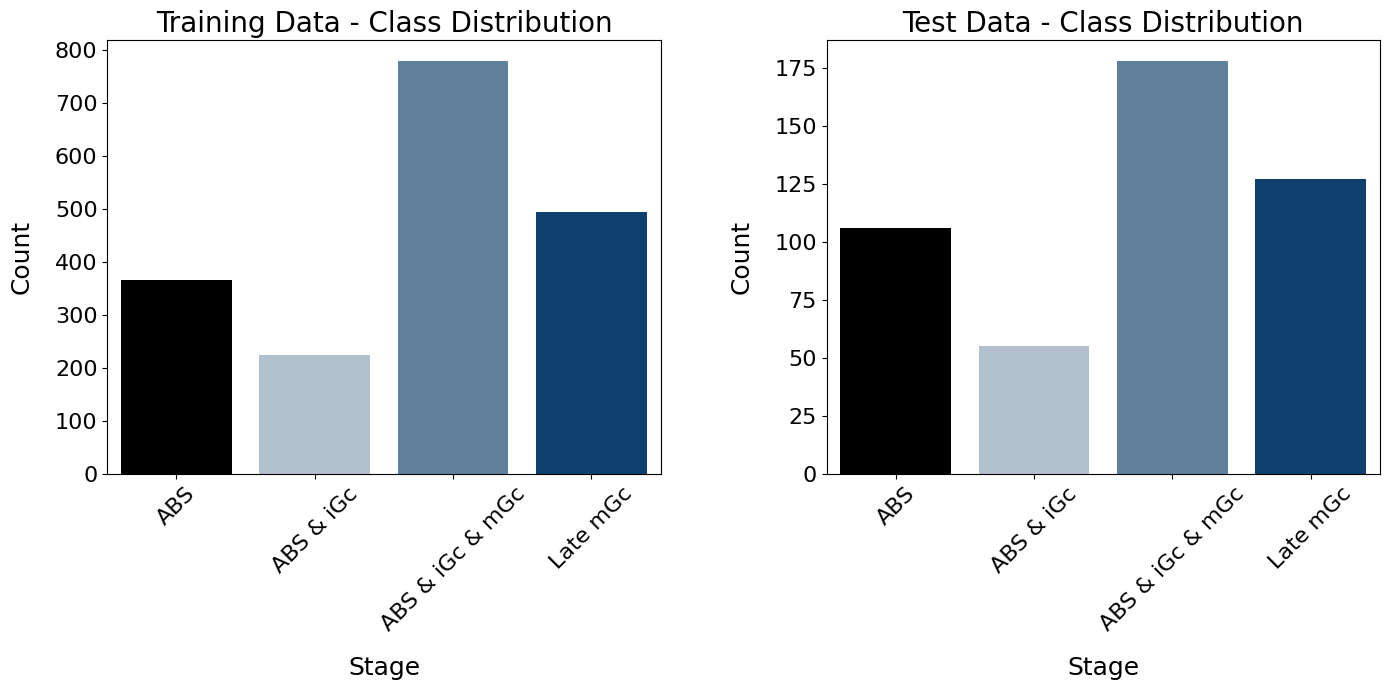

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
# Assuming X and y are defined elsewhere in your code
# Define class names and colors
class_names = ['ABS', 'ABS & iGc', 'ABS & iGc & mGc', 'Late mGc']
class_colors = ['black', '#aec0d2', '#5780a8', "#00407f"]

# Split the data into training and test sets
X=sxl
y=target["Stage"]
X_train= Xt_train
X_test= Xt_test
y_train= Yt_train
y_test =Yt_test

# Map the class labels to class names
y_train_mapped = y_train.map({i: class_names[i] for i in range(len(class_names))})
y_test_mapped = y_test.map({i: class_names[i] for i in range(len(class_names))})

# Define the palette using class_colors
palette = {class_names[i]: class_colors[i] for i in range(len(class_names))}

# Visualize class distributions
plt.figure(figsize=(14, 7))

# Plot for training data
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_mapped, palette=palette, order=class_names)
plt.title('Training Data - Class Distribution', fontsize=20)
plt.xlabel('Stage', labelpad=15, fontsize=18)  # Add space between label and axis
plt.ylabel('Count', labelpad=15, fontsize=18)   # Add space between label and axis
plt.xticks(rotation=45, fontsize=16)  # Adjust font size for x-axis labels
plt.yticks( fontsize=16)

# Plot for test data
plt.subplot(1, 2, 2)
sns.countplot(x=y_test_mapped, palette=palette, order=class_names)
plt.title('Test Data - Class Distribution', fontsize=20)
plt.xlabel('Stage', labelpad=15, fontsize=18)  # Add space between label and axis
plt.ylabel('Count', labelpad=15, fontsize=18)   # Add space between label and axis
plt.xticks(rotation=45, fontsize=16)  # Adjust font size for x-axis labels
plt.yticks( fontsize=16)

# Adjust layout to make room for the labels and titles
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Increase space between the two subplots

from google.colab import files

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/TestTrainingDistributionClass.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI
plt.show()
# Download the saved plot
files.download('/content/TestTrainingDistributionClass.jpeg')

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


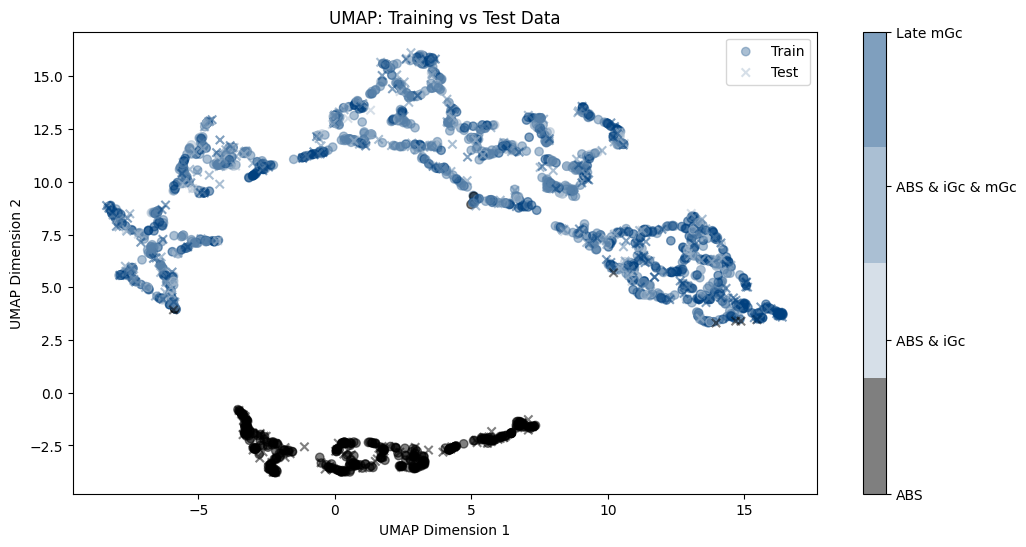

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import umap
# Define class names and colors
class_names = ['ABS', 'ABS & iGc', 'ABS & iGc & mGc', 'Late mGc']
class_colors = ['black', '#aec0d2', '#5780a8', '#00407f']

# Map class names to indices
class_mapping = {name: i for i, name in enumerate(class_names)}

# Split the data into training and test sets
X=sxl
y=target["Stage"]
X_train= Xt_train
X_test= Xt_test
y_train= Yt_train
y_test =Yt_test

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Class'] = [class_names[i] for i in y]


# Fit UMAP on the training data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

# Map class indices to class names for plotting
y_train_mapped = [class_names[i] for i in y_train]
y_test_mapped = [class_names[i] for i in y_test]

# Visualize UMAP results
plt.figure(figsize=(12, 6))

# Plot training data
scatter_train = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                            c=[class_mapping[name] for name in y_train_mapped],
                            cmap=ListedColormap(class_colors), alpha=0.5, label='Train')

# Plot test data
scatter_test = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1],
                           c=[class_mapping[name] for name in y_test_mapped],
                           cmap=ListedColormap(class_colors), alpha=0.5, label='Test', marker='x')

plt.title('UMAP: Training vs Test Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(loc='best')

# Create a custom colorbar
cbar = plt.colorbar(scatter_train, ticks=np.arange(len(class_names)))
cbar.ax.set_yticklabels(class_names)

from google.colab import files

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/TestTrainingUMAPClass.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI
plt.show()
# Download the saved plot
files.download('/content/TestTrainingUMAPClass.jpeg')

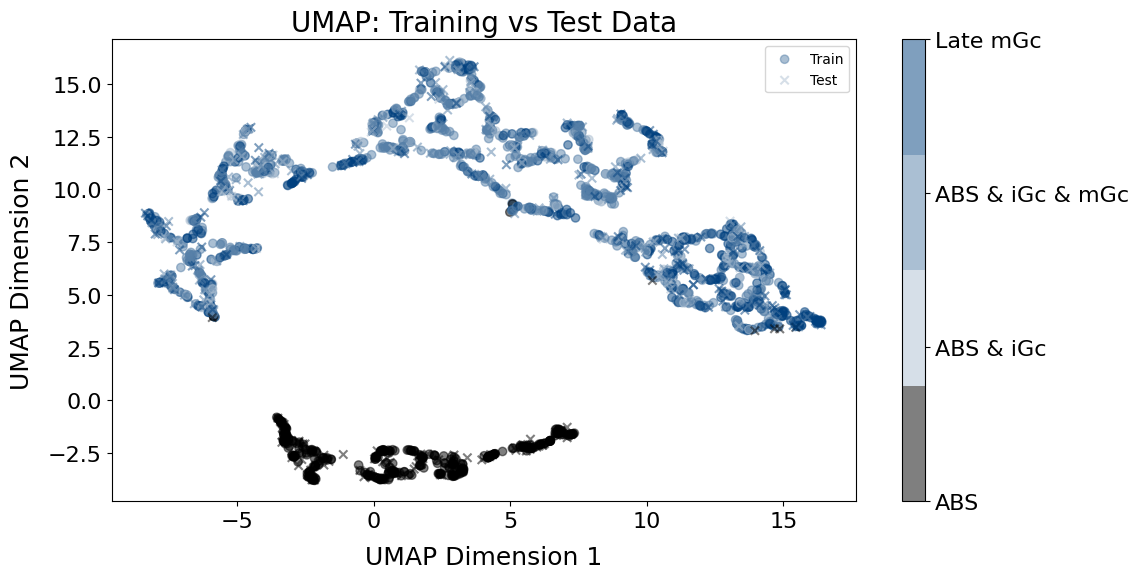

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Visualize UMAP results
plt.figure(figsize=(12, 6))

# Plot training data
scatter_train = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                            c=[class_mapping[name] for name in y_train_mapped],
                            cmap=ListedColormap(class_colors), alpha=0.5, label='Train')

# Plot test data
scatter_test = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1],
                           c=[class_mapping[name] for name in y_test_mapped],
                           cmap=ListedColormap(class_colors), alpha=0.5, label='Test', marker='x')

plt.title('UMAP: Training vs Test Data', fontsize=20)
plt.xlabel('UMAP Dimension 1',labelpad=10, fontsize=18)
plt.ylabel('UMAP Dimension 2',labelpad=10, fontsize=18)
plt.legend(loc='best')
plt.xticks(fontsize=16)  # Adjust font size for x-axis labels
plt.yticks( fontsize=16)
# Create a custom colorbar
cbar = plt.colorbar(scatter_train, ticks=np.arange(len(class_names)))
cbar.ax.set_yticklabels(class_names, fontsize=16)


from google.colab import files

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/TestTrainingUMAPClass.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI
plt.show()
# Download the saved plot
files.download('/content/TestTrainingUMAPClass.jpeg')



#Test set evaluation on models trained on oversampled or undersampled or unbalanced (imbalanced) data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def plsda_classifier(X_train, Y_train, X_test, Y_test, n_components=2, max_iter=1000):
    """
    Performs Partial Least Squares Discriminant Analysis (PLS-DA) followed by logistic regression
    to classify data and evaluate the model.

    Parameters:
    - X_train: Training features
    - Y_train: Training labels (one-hot encoded)
    - X_test: Testing features
    - Y_test: Testing labels (one-hot encoded)
    - n_components: Number of PLS components to use
    - max_iter: Maximum number of iterations for the logistic regression

    Returns:
    - y_pred: Predicted labels
    - y_prob: Predicted probabilities
    - X_test_pls_transformed: Transformed test features
    - Y_test_transformed: True labels for the test set
    """
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train, Y_train)
    X_train_pls_transformed = pls.transform(X_train)
    X_test_pls_transformed = pls.transform(X_test)

    clf = LogisticRegression(multi_class='ovr', max_iter=max_iter)
    y_train_labels = Y_train.argmax(axis=1) if Y_train.ndim > 1 else Y_train
    clf.fit(X_train_pls_transformed, y_train_labels)

    y_pred = clf.predict(X_test_pls_transformed)
    y_prob = clf.predict_proba(X_test_pls_transformed) if hasattr(clf, 'predict_proba') else None
    y_test_labels = Y_test.argmax(axis=1) if Y_test.ndim > 1 else Y_test

    return y_pred, y_prob, X_test_pls_transformed, y_test_labels


classifiers = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=2, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel='linear', C=1, probability=True, random_state=42),
    "GaussianNB": GaussianNB(),
    "K-nearest neighbor": KNeighborsClassifier(n_neighbors=7),
    "PLS-DA": None  # Special handling for PLS-DA
}

def print_metrics(Y_test, y_pred, y_prob, binarize=False):
    """
    Prints evaluation metrics for a model.

    Parameters:
    - Y_test: True labels for the test set
    - y_pred: Predicted labels by the model
    - y_prob: Predicted probabilities by the model
    - binarize: Boolean flag indicating if labels are binarized
    """
    accuracy = accuracy_score(Y_test, y_pred)
    precision_weighted = precision_score(Y_test, y_pred, average="weighted")
    precision_macro = precision_score(Y_test, y_pred, average="macro")
    recall_weighted = recall_score(Y_test, y_pred, average="weighted")
    recall_macro = recall_score(Y_test, y_pred, average="macro")
    f1_weighted = f1_score(Y_test, y_pred, average="weighted")
    f1_macro = f1_score(Y_test, y_pred, average="macro")

    if binarize:
        try:
            roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class='ovr') if y_prob is not None else None
            roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class='ovo') if y_prob is not None else None
        except ValueError as e:
            roc_auc_ovr = roc_auc_ovo = None
            print(f"ROC AUC calculation error: {e}")
    else:
        try:
            roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class='ovr', average='macro') if y_prob is not None else None
            roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class='ovo', average='macro') if y_prob is not None else None
        except ValueError as e:
            roc_auc_ovr = roc_auc_ovo = None
            print(f"ROC AUC calculation error: {e}")

    conf_matrix = confusion_matrix(Y_test, y_pred)
    class_report = classification_report(Y_test, y_pred)

    print("Model Performance Metrics")
    print("-------------------------")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision-weighted: {precision_weighted:.4f}")
    print(f"Precision-macro: {precision_macro:.4f}")
    print(f"Recall-weighted:    {recall_weighted:.4f}")
    print(f"Recall-macro:    {recall_macro:.4f}")
    print(f"F1 Score-weighted:  {f1_weighted:.4f}")
    print(f"F1 Score-macro:  {f1_macro:.4f}")
    if roc_auc_ovr is not None:
        print(f"ROC AUC (ovr):   {roc_auc_ovr:.4f}")
    if roc_auc_ovo is not None:
        print(f"ROC AUC (ovo):   {roc_auc_ovo:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


def train_and_evaluate_model(clf_name, clf, Xt_train, Yt_train, Xt_test, Yt_test, binarize=False):
    """
    Trains and evaluates a model using different sampling strategies.

    Parameters:
    - clf_name: Name of the classifier
    - clf: Classifier instance
    - Xt_train: Training features
    - Yt_train: Training labels
    - Xt_test: Testing features
    - Yt_test: Testing labels
    - binarize: Boolean flag indicating if labels are binarized
    """
    print(f"\n--- {clf_name} ---")

    if clf_name == "PLS-DA":
        oversampler = SMOTE(random_state=42)
        undersampler = RandomUnderSampler(random_state=42)

        # Original data
        print("\nOriginal Data:")
        y_pred, y_prob, _, y_test_transformed = plsda_classifier(Xt_train, Yt_train, Xt_test, Yt_test)
        print_metrics(y_test_transformed, y_pred, y_prob, binarize=True)

        # Oversampled data
        print("\nOversampled Data:")
        Xt_train_oversampled, Yt_train_oversampled = oversampler.fit_resample(Xt_train, Yt_train)
        y_pred, y_prob, _, y_test_transformed = plsda_classifier(Xt_train_oversampled, Yt_train_oversampled, Xt_test, Yt_test)
        print_metrics(y_test_transformed, y_pred, y_prob, binarize=True)

        # Undersampled data
        print("\nUndersampled Data:")
        Xt_train_undersampled, Yt_train_undersampled = undersampler.fit_resample(Xt_train, Yt_train)
        y_pred, y_prob, _, y_test_transformed = plsda_classifier(Xt_train_undersampled, Yt_train_undersampled, Xt_test, Yt_test)
        print_metrics(y_test_transformed, y_pred, y_prob, binarize=True)

    else:
        pipelines = {
            'Original': Pipeline([('clf', clf)]),
            'Oversampled': Pipeline([
                ('sampling', SMOTE(random_state=42)),
                ('clf', clf)
            ]),
            'Undersampled': Pipeline([
                ('sampling', RandomUnderSampler(random_state=42)),
                ('clf', clf)
            ])
        }

        for strategy, pipeline in pipelines.items():
            print(f"\n{strategy} Data:")
            pipeline.fit(Xt_train, Yt_train)
            y_pred = pipeline.predict(Xt_test)
            y_prob = pipeline.predict_proba(Xt_test) if hasattr(pipeline, 'predict_proba') else None
            print_metrics(Yt_test, y_pred, y_prob, binarize=binarize)


X = sxl  # Features
y = target["Stage"]  # Target variable with 4 classes

Y_plsda = LabelBinarizer().fit_transform(y)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
Xt_train_plsda, Xt_test_plsda, Yt_train_plsda, Yt_test_plsda = train_test_split(X, Y_plsda, test_size=0.2, random_state=42)

for clf_name, clf in classifiers.items():
    if clf_name == "PLS-DA":
        train_and_evaluate_model(clf_name, clf, Xt_train_plsda, Yt_train_plsda, Xt_test_plsda, Yt_test_plsda, binarize=True)
    else:
        train_and_evaluate_model(clf_name, clf, Xt_train, Yt_train, Xt_test, Yt_test, binarize=False)



--- RandomForestClassifier ---

Original Data:
Model Performance Metrics
-------------------------
Accuracy:  0.6738
Precision-weighted: 0.6666
Precision-macro: 0.6278
Recall-weighted:    0.6738
Recall-macro:    0.6085
F1 Score-weighted:  0.6624
F1 Score-macro:  0.6112
ROC AUC (ovr):   0.8256
ROC AUC (ovo):   0.8257

Confusion Matrix:
[[106   0   0   0]
 [  0  10  34  11]
 [  0  21 136  21]
 [  0   9  56  62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.25      0.18      0.21        55
           2       0.60      0.76      0.67       178
           3       0.66      0.49      0.56       127

    accuracy                           0.67       466
   macro avg       0.63      0.61      0.61       466
weighted avg       0.67      0.67      0.66       466


Oversampled Data:
Model Performance Metrics
-------------------------
Accuracy:  0.6567
Precision-weighted: 0.6576
Precision-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined

Model Performance Metrics
-------------------------
Accuracy:  0.6266
Precision-weighted: 0.5657
Precision-macro: 0.5084
Recall-weighted:    0.6266
Recall-macro:    0.5282
F1 Score-weighted:  0.5641
F1 Score-macro:  0.4936
ROC AUC (ovr):   0.8127
ROC AUC (ovo):   0.8157

Confusion Matrix:
[[106   0   0   0]
 [  0   0  49   6]
 [  0   0 156  22]
 [  0   0  97  30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.00      0.00      0.00        55
           2       0.52      0.88      0.65       178
           3       0.52      0.24      0.32       127

    accuracy                           0.63       466
   macro avg       0.51      0.53      0.49       466
weighted avg       0.57      0.63      0.56       466


Oversampled Data:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance Metrics
-------------------------
Accuracy:  0.5751
Precision-weighted: 0.6050
Precision-macro: 0.5733
Recall-weighted:    0.5751
Recall-macro:    0.5859
F1 Score-weighted:  0.5832
F1 Score-macro:  0.5708
ROC AUC (ovr):   0.8134
ROC AUC (ovo):   0.8188

Confusion Matrix:
[[106   0   0   0]
 [  0  23  19  13]
 [  0  50  75  53]
 [  0  24  39  64]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.24      0.42      0.30        55
           2       0.56      0.42      0.48       178
           3       0.49      0.50      0.50       127

    accuracy                           0.58       466
   macro avg       0.57      0.59      0.57       466
weighted avg       0.61      0.58      0.58       466


Undersampled Data:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance Metrics
-------------------------
Accuracy:  0.5687
Precision-weighted: 0.6080
Precision-macro: 0.5743
Recall-weighted:    0.5687
Recall-macro:    0.5885
F1 Score-weighted:  0.5768
F1 Score-macro:  0.5678
ROC AUC (ovr):   0.8132
ROC AUC (ovo):   0.8185

Confusion Matrix:
[[106   0   0   0]
 [  0  25  14  16]
 [  0  55  69  54]
 [  0  26  36  65]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.24      0.45      0.31        55
           2       0.58      0.39      0.46       178
           3       0.48      0.51      0.50       127

    accuracy                           0.57       466
   macro avg       0.57      0.59      0.57       466
weighted avg       0.61      0.57      0.58       466


--- SVC ---

Original Data:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined

Model Performance Metrics
-------------------------
Accuracy:  0.6330
Precision-weighted: 0.5791
Precision-macro: 0.5203
Recall-weighted:    0.6330
Recall-macro:    0.5284
F1 Score-weighted:  0.5573
F1 Score-macro:  0.4855
ROC AUC (ovr):   0.8076
ROC AUC (ovo):   0.8103

Confusion Matrix:
[[106   0   0   0]
 [  0   0  49   6]
 [  0   0 166  12]
 [  0   0 104  23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.00      0.00      0.00        55
           2       0.52      0.93      0.67       178
           3       0.56      0.18      0.27       127

    accuracy                           0.63       466
   macro avg       0.52      0.53      0.49       466
weighted avg       0.58      0.63      0.56       466


Oversampled Data:
Model Performance Metrics
-------------------------
Accuracy:  0.5601
Precision-weighted: 0.5946
Precision-macro: 0.5666
Recall-weighted:    0.5601
Recall-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined

Model Performance Metrics
-------------------------
Accuracy:  0.6073
Precision-weighted: 0.4158
Precision-macro: 0.3733
Recall-weighted:    0.6073
Recall-macro:    0.4976
F1 Score-weighted:  0.4787
F1 Score-macro:  0.4139
ROC AUC (ovr):   0.7519
ROC AUC (ovo):   0.7587

Confusion Matrix:
[[105   0   1   0]
 [  0   0  55   0]
 [  0   0 178   0]
 [  0   0 127   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.00      0.00      0.00        55
           2       0.49      1.00      0.66       178
           3       0.00      0.00      0.00       127

    accuracy                           0.61       466
   macro avg       0.37      0.50      0.41       466
weighted avg       0.42      0.61      0.48       466


Oversampled Data:
Model Performance Metrics
-------------------------
Accuracy:  0.5258
Precision-weighted: 0.5775
Precision-macro: 0.5410
Recall-weighted:    0.5258
Recall-

# Model cross-validation (5-fold and 10-fold)

In [ ]:

df=sxl.reset_index(drop=True)
df

,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds
0,1.6220,3.407,4.263,287.8,12.47,0.0,2.00,0.09091,2.0
1,0.4949,3.498,4.065,430.5,109.40,4.0,6.00,0.10530,4.0
2,2.0610,2.407,2.246,377.4,80.06,2.0,6.00,0.13330,4.0
3,0.4456,2.992,3.397,576.6,102.50,1.0,10.00,0.11360,5.0
4,2.0630,2.935,2.935,298.4,46.15,0.0,5.00,0.04167,1.0
...,...,...,...,...,...,...,...,...,...
2325,1.3290,1.472,4.176,390.5,3.00,6.0,87.66,0.27590,8.0
2326,2.8060,1.704,2.811,514.7,3.00,7.0,84.91,0.29270,12.0
2327,0.6185,2.662,5.562,361.5,0.00,2.0,7.12,0.17240,5.0
2328,1.6450,1.900,1.900,438.3,1.00,8.0,96.66,0.14290,4.0


<ipython-input-25-9df78be40959>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-25-9df78be40959>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-25-9df78be40959>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-25-9df78be40959>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-25-9df78be40959>:62: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  overall_tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-25-9df78be40959>:71: DeprecationWar

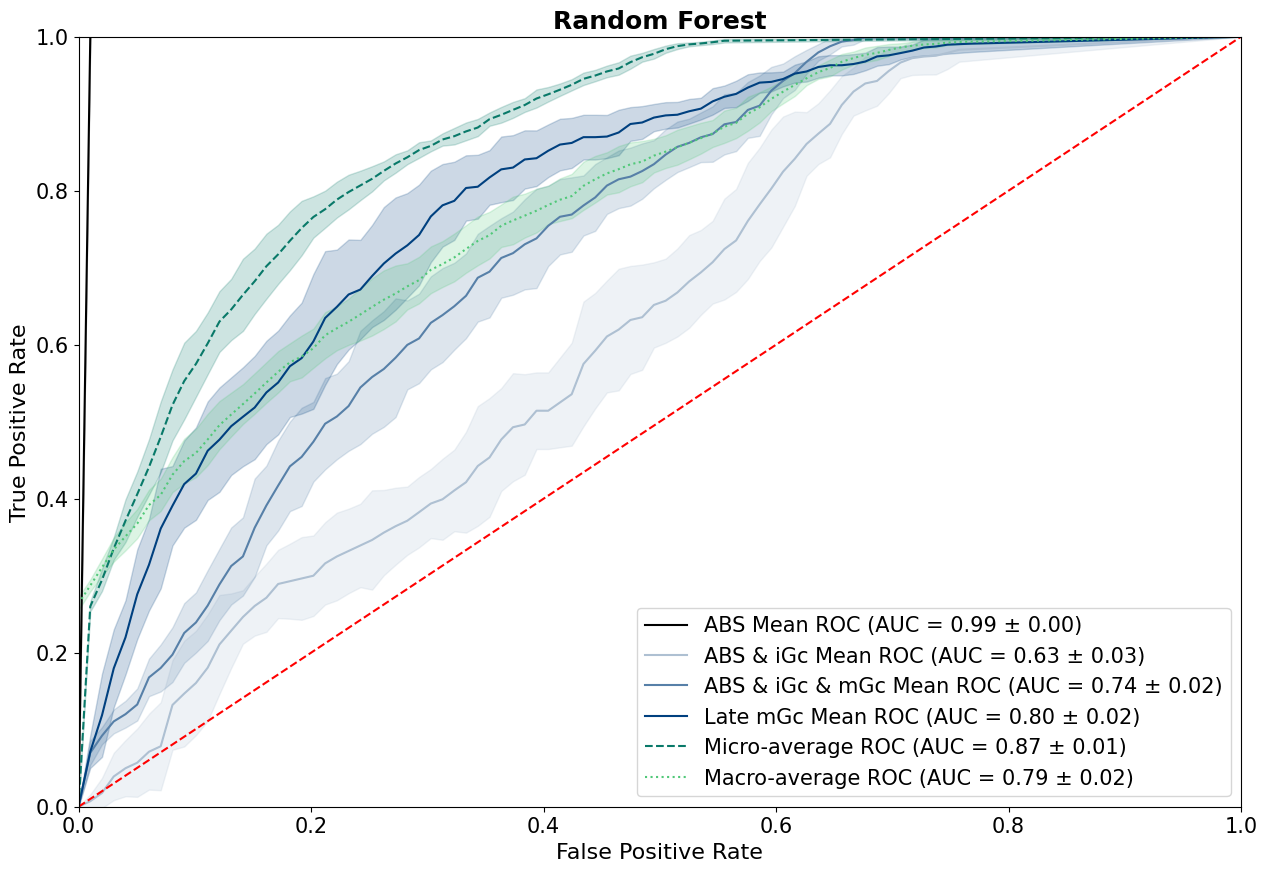

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Define X and y of dataset
X=df
y= target["Stage"]


# Binarize the output for multiclass ROC-AUC
y_bin = label_binarize(y, classes=np.unique(y))


# Define class names and colors
class_names = ['ABS', 'ABS & iGc', 'ABS & iGc & mGc', 'Late mGc', 'Overall']
class_colors = ['black', '#aec0d2', '#5780a8', "#00407f", "red"]
# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifier = RandomForestClassifier(random_state=42)


# Arrays to store results for each class
mean_fpr = np.linspace(0, 1, 100)
tprs = {i: [] for i in range(y_bin.shape[1])}
aucs = {i: [] for i in range(y_bin.shape[1])}

# Overall model performance
overall_tprs = []
overall_aucs = []

# Macro-average ROC
macro_tprs = []

# Cross-validation loop
for train_index, test_index in cv.split(X, y):
    # Align indices with DataFrame
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])
        if len(fpr) > 1 and len(tpr) > 1:  # Check to avoid errors in interpolation
            tprs[i].append(interp(mean_fpr, fpr, tpr))
            tprs[i][-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs[i].append(roc_auc)

    # Compute the micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_bin[test_index].ravel(), y_score.ravel())
    if len(fpr) > 1 and len(tpr) > 1:
        overall_tprs.append(interp(mean_fpr, fpr, tpr))
        overall_tprs[-1][0] = 0.0
        overall_aucs.append(auc(fpr, tpr))

    # Compute the macro-average ROC curve for the current fold
    all_fpr = np.unique(np.concatenate([roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])[0] for i in range(y_bin.shape[1])]))
    mean_tprs_macro = np.zeros_like(all_fpr)
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])
        mean_tprs_macro += interp(all_fpr, fpr, tpr)
    mean_tprs_macro /= y_bin.shape[1]
    mean_tprs_macro[-1] = 1.0
    macro_tprs.append(interp(mean_fpr, all_fpr, mean_tprs_macro))

# Compute the mean and standard deviation of TPRs for each class
mean_tprs = {i: np.mean(tprs[i], axis=0) for i in range(y_bin.shape[1])}
for mean_tpr in mean_tprs.values():
    mean_tpr[-1] = 1.0

mean_aucs = {i: auc(mean_fpr, mean_tprs[i]) for i in range(y_bin.shape[1])}
std_aucs = {i: np.std(aucs[i]) for i in range(y_bin.shape[1])}
std_tprs = {i: np.std(tprs[i], axis=0) for i in range(y_bin.shape[1])}

# Compute the overall mean and standard deviation of TPRs
mean_overall_tpr = np.mean(overall_tprs, axis=0)
mean_overall_tpr[-1] = 1.0
mean_overall_auc = auc(mean_fpr, mean_overall_tpr)
std_overall_auc = np.std(overall_aucs)
std_overall_tpr = np.std(overall_tprs, axis=0)

# Compute the macro-average mean and standard deviation of TPRs
mean_macro_tpr = np.mean(macro_tprs, axis=0)
mean_macro_tpr[-1] = 1.0
mean_macro_auc = auc(mean_fpr, mean_macro_tpr)
std_macro_tpr = np.std(macro_tprs, axis=0)

# Plotting
plt.figure(figsize=(15, 10))

# Plot ROC curves for each class
for i in range(y_bin.shape[1]):
    plt.plot(mean_fpr, mean_tprs[i], label=f'{class_names[i]} Mean ROC (AUC = {mean_aucs[i]:.2f} ± {std_aucs[i]:.2f})', color=class_colors[i])
    plt.fill_between(mean_fpr, mean_tprs[i] - std_tprs[i], mean_tprs[i] + std_tprs[i], color=class_colors[i], alpha=0.2)

# Plot overall ROC curve (micro-average)
plt.plot(mean_fpr, mean_overall_tpr, color='#097969', label=f'Micro-average ROC (AUC = {mean_overall_auc:.2f} ± {std_overall_auc:.2f})', linestyle='--') #Cadmium Green
plt.fill_between(mean_fpr, mean_overall_tpr - std_overall_tpr, mean_overall_tpr + std_overall_tpr, color='#097969', alpha=0.2)

# Plot mean class-wise ROC-AUC curve (macro-average)
plt.plot(mean_fpr, mean_macro_tpr, color='#50C878', linestyle=':', label=f'Macro-average ROC (AUC = {mean_macro_auc:.2f} ± {std_macro_tpr.mean():.2f})') #Celadon color
plt.fill_between(mean_fpr, mean_macro_tpr - std_macro_tpr, mean_macro_tpr + std_macro_tpr, color='#50C878', alpha=0.2)

plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Random Forest', fontsize=18, fontweight='bold')
plt.legend(loc='lower right')
# Set the title with bold font
# Add a legend with increased font size
plt.legend(fontsize=15)

# Increase font size for tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

from google.colab import files

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/CV5_RF_ROC_curve.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI
plt.show()
# Download the saved plot
files.download('/content/CV5_RF_ROC_curve.jpeg')

<ipython-input-26-960d98754add>:56: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-26-960d98754add>:56: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-26-960d98754add>:56: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-26-960d98754add>:56: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs[i].append(interp(mean_fpr, fpr, tpr))
<ipython-input-26-960d98754add>:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  overall_tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-26-960d98754add>:73: DeprecationWar

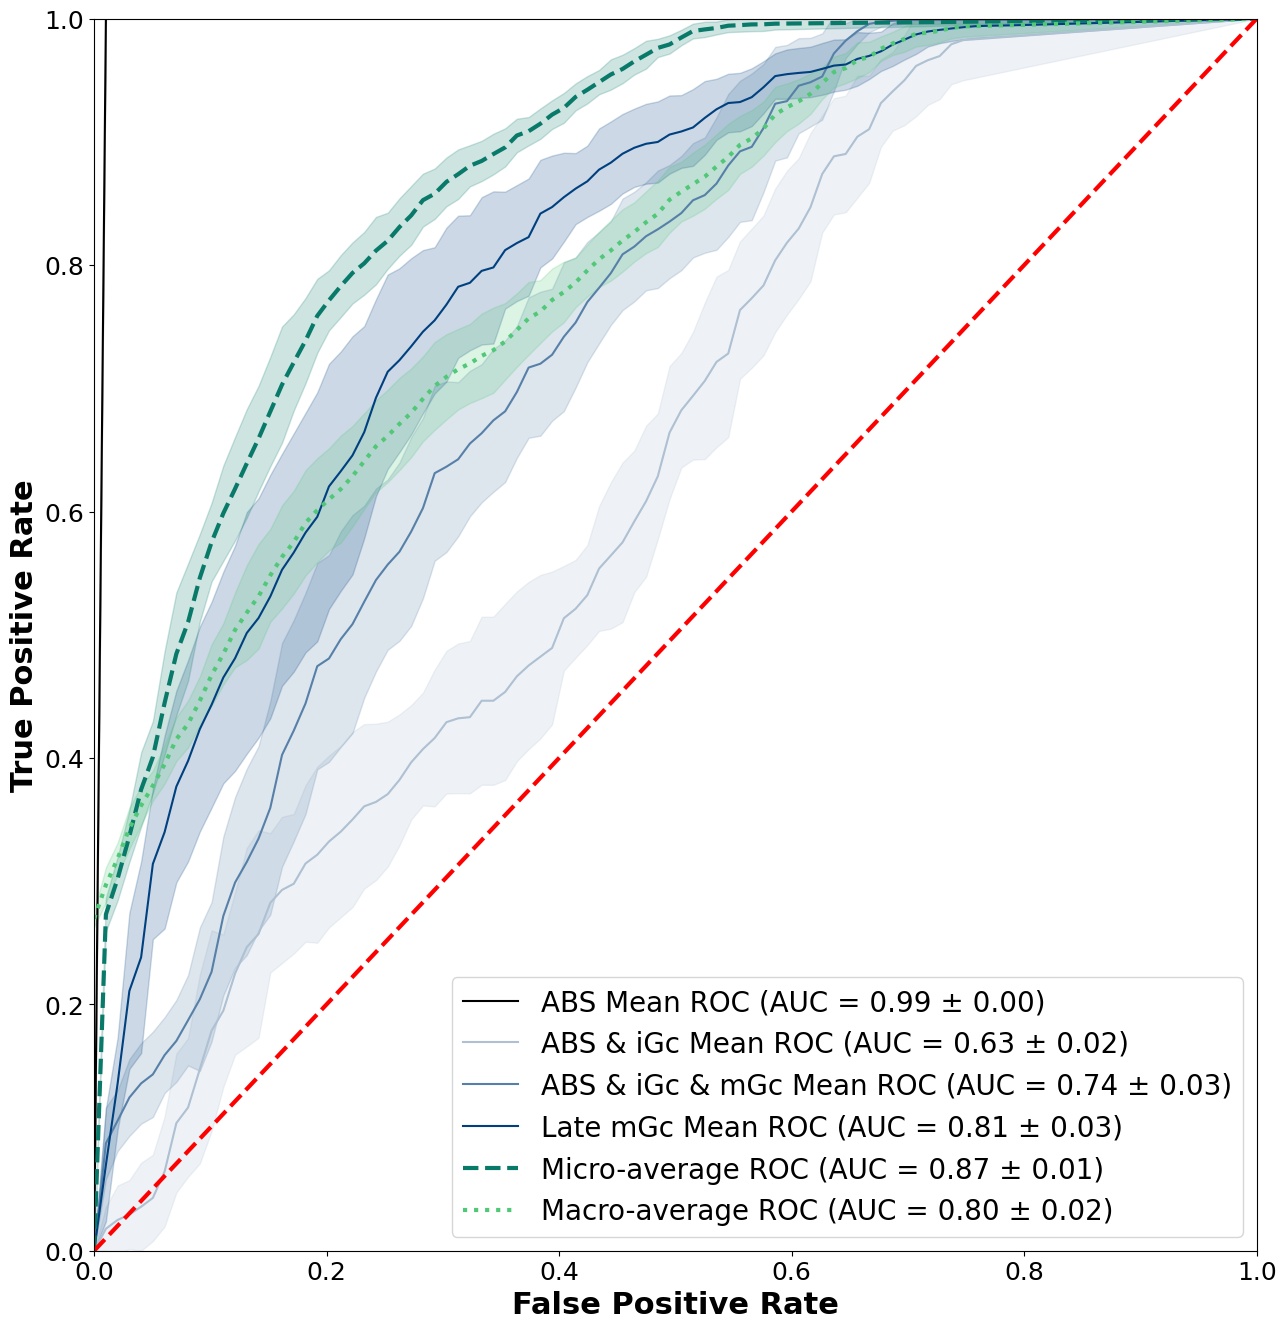

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

#Define X and y of dataset
X=df
y= target["Stage"]
lw=3

# Binarize the output for multiclass ROC-AUC
y_bin = label_binarize(y, classes=np.unique(y))


# Set up cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = RandomForestClassifier(random_state=42)


# Define class names and colors
class_names = ['ABS', 'ABS & iGc', 'ABS & iGc & mGc', 'Late mGc', 'Overall']
class_colors = ['black', '#aec0d2', '#5780a8', "#00407f", "red"]


# Arrays to store results for each class
mean_fpr = np.linspace(0, 1, 100)
tprs = {i: [] for i in range(y_bin.shape[1])}
aucs = {i: [] for i in range(y_bin.shape[1])}

# Overall model performance
overall_tprs = []
overall_aucs = []

# Macro-average ROC
macro_tprs = []

# Cross-validation loop
for train_index, test_index in cv.split(X, y):
    # Align indices with DataFrame
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])
        if len(fpr) > 1 and len(tpr) > 1:  # Check to avoid errors in interpolation
            tprs[i].append(interp(mean_fpr, fpr, tpr))
            tprs[i][-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs[i].append(roc_auc)

    # Compute the micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_bin[test_index].ravel(), y_score.ravel())
    if len(fpr) > 1 and len(tpr) > 1:
        overall_tprs.append(interp(mean_fpr, fpr, tpr))
        overall_tprs[-1][0] = 0.0
        overall_aucs.append(auc(fpr, tpr))

    # Compute the macro-average ROC curve for the current fold
    all_fpr = np.unique(np.concatenate([roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])[0] for i in range(y_bin.shape[1])]))
    mean_tprs_macro = np.zeros_like(all_fpr)
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])
        mean_tprs_macro += interp(all_fpr, fpr, tpr)
    mean_tprs_macro /= y_bin.shape[1]
    mean_tprs_macro[-1] = 1.0
    macro_tprs.append(interp(mean_fpr, all_fpr, mean_tprs_macro))

# Compute the mean and standard deviation of TPRs for each class
mean_tprs = {i: np.mean(tprs[i], axis=0) for i in range(y_bin.shape[1])}
for mean_tpr in mean_tprs.values():
    mean_tpr[-1] = 1.0

mean_aucs = {i: auc(mean_fpr, mean_tprs[i]) for i in range(y_bin.shape[1])}
std_aucs = {i: np.std(aucs[i]) for i in range(y_bin.shape[1])}
std_tprs = {i: np.std(tprs[i], axis=0) for i in range(y_bin.shape[1])}

# Compute the overall mean and standard deviation of TPRs
mean_overall_tpr = np.mean(overall_tprs, axis=0)
mean_overall_tpr[-1] = 1.0
mean_overall_auc = auc(mean_fpr, mean_overall_tpr)
std_overall_auc = np.std(overall_aucs)
std_overall_tpr = np.std(overall_tprs, axis=0)

# Compute the macro-average mean and standard deviation of TPRs
mean_macro_tpr = np.mean(macro_tprs, axis=0)
mean_macro_tpr[-1] = 1.0
mean_macro_auc = auc(mean_fpr, mean_macro_tpr)
std_macro_tpr = np.std(macro_tprs, axis=0)

# Plotting
plt.figure(figsize=(15, 16))

# Plot ROC curves for each class
for i in range(y_bin.shape[1]):
    plt.plot(mean_fpr, mean_tprs[i], label=f'{class_names[i]} Mean ROC (AUC = {mean_aucs[i]:.2f} ± {std_aucs[i]:.2f})', color=class_colors[i])
    plt.fill_between(mean_fpr, mean_tprs[i] - std_tprs[i], mean_tprs[i] + std_tprs[i], color=class_colors[i], alpha=0.2)

# Plot overall ROC curve (micro-average)
plt.plot(mean_fpr, mean_overall_tpr, color='#097969', label=f'Micro-average ROC (AUC = {mean_overall_auc:.2f} ± {std_overall_auc:.2f})', linestyle='--', linewidth=lw)
plt.fill_between(mean_fpr, mean_overall_tpr - std_overall_tpr, mean_overall_tpr + std_overall_tpr, color='#097969', alpha=0.2)

# Plot mean class-wise ROC-AUC curve (macro-average)
plt.plot(mean_fpr, mean_macro_tpr, color='#50C878', linestyle=':', linewidth=lw, label=f'Macro-average ROC (AUC = {mean_macro_auc:.2f} ± {std_macro_tpr.mean():.2f})')
plt.fill_between(mean_fpr, mean_macro_tpr - std_macro_tpr, mean_macro_tpr + std_macro_tpr, color='#50C878', alpha=0.2)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', linewidth=lw)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=22, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=22, fontweight='bold')
#plt.title('Random Forest', fontsize=20, fontweight='bold')
plt.legend(loc='lower right', frameon=True)
# Set the title with bold font
# Add a legend with increased font size
plt.legend(fontsize=20)

# Increase font size for tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

from google.colab import files

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/CV10_RF_ROC_curvelean.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI
plt.show()
# Download the saved plot
files.download('/content/CV10_RF_ROC_curvelean.jpeg')

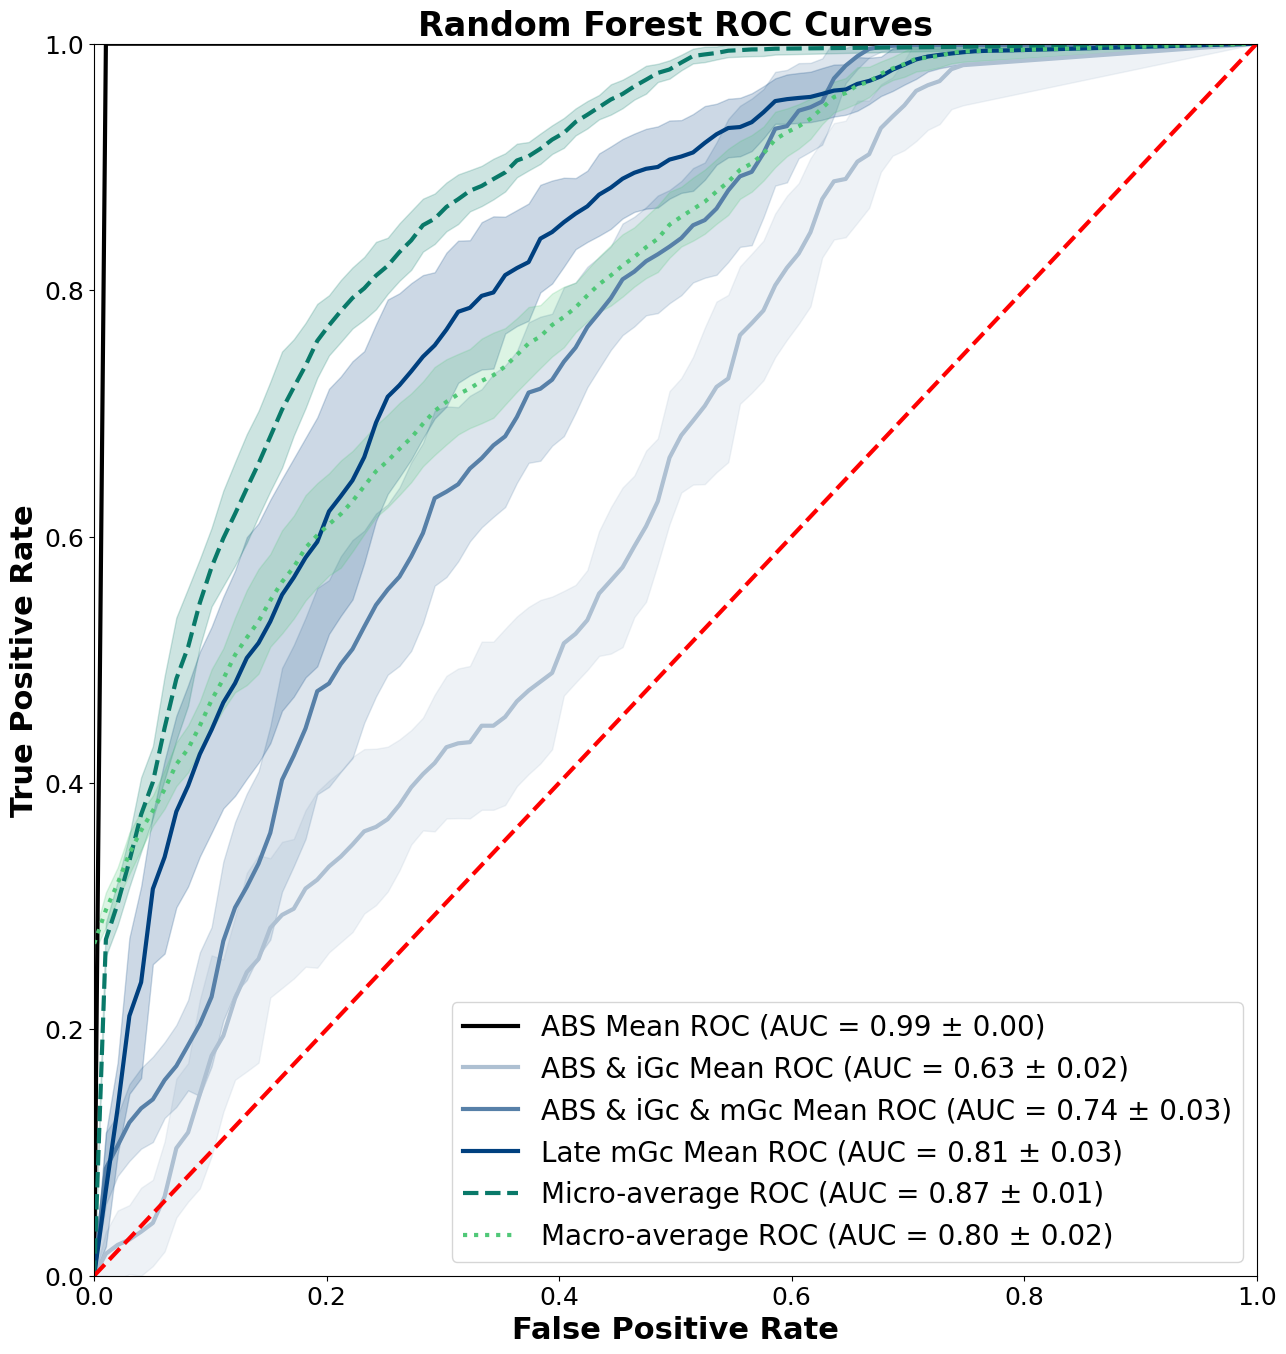

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Plotting
plt.figure(figsize=(15, 16))

# Plot ROC curves for each class
for i in range(y_bin.shape[1]):
    plt.plot(mean_fpr, mean_tprs[i], label=f'{class_names[i]} Mean ROC (AUC = {mean_aucs[i]:.2f} ± {std_aucs[i]:.2f})', color=class_colors[i], linewidth=lw)
    plt.fill_between(mean_fpr, mean_tprs[i] - std_tprs[i], mean_tprs[i] + std_tprs[i], color=class_colors[i], alpha=0.2)

# Plot overall ROC curve (micro-average)
plt.plot(mean_fpr, mean_overall_tpr, color='#097969', label=f'Micro-average ROC (AUC = {mean_overall_auc:.2f} ± {std_overall_auc:.2f})', linestyle='--', linewidth=lw)
plt.fill_between(mean_fpr, mean_overall_tpr - std_overall_tpr, mean_overall_tpr + std_overall_tpr, color='#097969', alpha=0.2)

# Plot mean class-wise ROC-AUC curve (macro-average)
plt.plot(mean_fpr, mean_macro_tpr, color='#50C878', linestyle=':', linewidth=lw, label=f'Macro-average ROC (AUC = {mean_macro_auc:.2f} ± {std_macro_tpr.mean():.2f})')
plt.fill_between(mean_fpr, mean_macro_tpr - std_macro_tpr, mean_macro_tpr + std_macro_tpr, color='#50C878', alpha=0.2)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', linewidth=lw)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=22, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=22, fontweight='bold')
plt.title('Random Forest ROC Curves', fontsize=24, fontweight='bold')
plt.legend(loc='lower right', fontsize=20, frameon=True)

# Increase font size for tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Save the plot to a file with high resolution (DPI)
plt.savefig('/content/CV10_RF_ROC_curvelean.jpeg', format='jpeg', dpi=300)  # Save as JPEG with 300 DPI

# Display the plot
plt.show()

# Download the saved plot
from google.colab import files
files.download('/content/CV10_RF_ROC_curvelean.jpeg')

#Identifying important features predictive of stage-specific compound activity

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 32.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# training a Naive Bayes classifier

rf = RandomForestClassifier(random_state=42).fit(Xt_train, Yt_train)
rf_predictions = rf.predict(Xt_test)

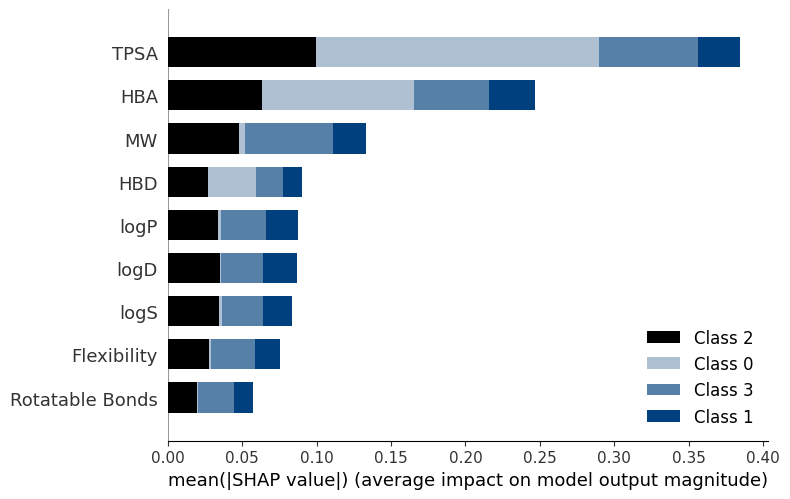

In [ ]:
import shap
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
# Calculate SHAP values
explainer = shap.Explainer(rf)
shap_values = explainer(sxl)
your_class_names= ["ABS","ABS & IgC", 'ABS & iGc & mGc','Late mGc']
# Define custom colors
class_colors = ['black', '#aec0d2', '#5780a8', "#00407f"]  # Adjust to match your class colors

# Create a color map from the list
cmap = mcolors.ListedColormap(class_colors)
# Plot SHAP values for each class
shap.summary_plot(
    [shap_values[:, :, your_class_names].values for your_class_names in range(shap_values.shape[-1])],
    feature_names=Xt_train.columns,
    plot_type="bar",
    color=cmap
)

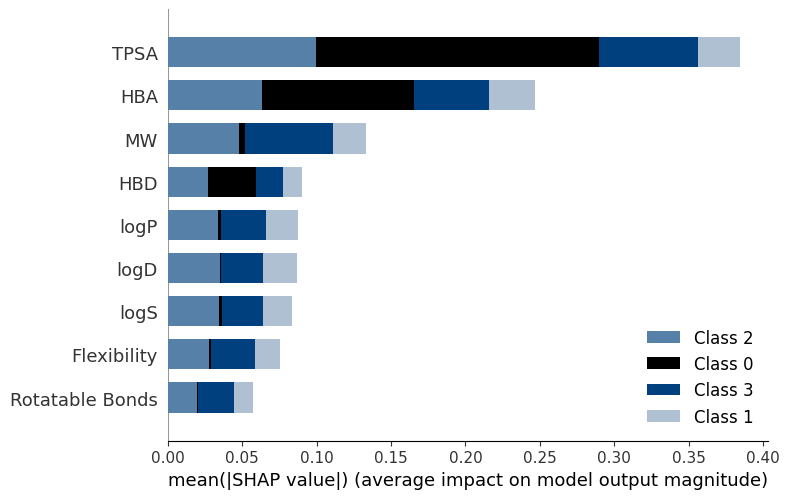

In [ ]:
import shap
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
# Calculate SHAP values
explainer = shap.Explainer(rf)
shap_values = explainer(sxl)
#Redo and match correct colors to classes
#Class Mapping:  {0: 'ABS', 1: 'ABS_IgC', 2: 'ABS_iGc_mGc', 3: 'Late_mGC'}
#your_class_names= ["ABS","ABS & IgC", 'ABS & iGc & mGc','Late mGc']
# Shapely bar chart order : class 2; class 0; class 3; class 1
# Define custom colors
#class_colors = ['black', '#aec0d2', '#5780a8', "#00407f"]
# Define custom colors
class_colors = ['#5780a8', 'black', '#00407f', "#aec0d2"]

# Create a color map from the list
cmap = mcolors.ListedColormap(class_colors)
# Plot SHAP values for each class
shap.summary_plot(
    [shap_values[:, :, your_class_names].values for your_class_names in range(shap_values.shape[-1])],
    feature_names=Xt_train.columns,
    plot_type="bar",
    color=cmap
)

# Packages and versions used

In [ ]:
# ---------------------------------------------------------------
# NOTE:
# This code is intended as a backup record of all the packages
# and their versions originally used in this environment. It
# should not be run during normal operations. Instead, it serves
# as a reference to track versions of packages and their dependencies,
# and can be used for troubleshooting when package versions change.
# ---------------------------------------------------------------
!pip list > installed_packages.txt

# Displaying the contents of the file
!cat installed_packages.txt

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [ ]:
import pandas as pd
import subprocess

# Get the list of installed packages
result = subprocess.run(['pip', 'list'], stdout=subprocess.PIPE)
installed_packages = result.stdout.decode('utf-8')

# Convert the list of installed packages to a DataFrame
packages = [pkg.split() for pkg in installed_packages.split('\n')[2:-1]]
df = pd.DataFrame(packages, columns=['Package', 'Version'])

# Display the DataFrame
df.head()

,Package,Version
0,absl-py,1.4.0
1,accelerate,0.32.1
2,aiohttp,3.9.5
3,aiosignal,1.3.1
4,alabaster,0.7.16


In [ ]:
# List of packages to check versions
package_list = ['pandas', 'numpy', 'scikit-learn', 'shap', 'matplotlib',  'umap-learn', 'imblearn', 'scipy'] # These are the some of the packages used in this script

# Filter the DataFrame for the packages in your list
filtered_df = df[df['Package'].isin(package_list)]

# Display the filtered DataFrame
print(filtered_df)

# Optionally, you can print out their versions in a more readable format
for _, row in filtered_df.iterrows():
    print(f"Package: {row['Package']}, Version: {row['Version']}")

          Package Version
236    matplotlib   3.7.1
270         numpy  1.25.2
283        pandas   2.0.3
383  scikit-learn   1.2.2
384         scipy  1.11.4
392          shap  0.46.0
473    umap-learn   0.5.6
Package: matplotlib, Version: 3.7.1
Package: numpy, Version: 1.25.2
Package: pandas, Version: 2.0.3
Package: scikit-learn, Version: 1.2.2
Package: scipy, Version: 1.11.4
Package: shap, Version: 0.46.0
Package: umap-learn, Version: 0.5.6
